Варіант 3
Контекст:
Вам надані дані про клієнтів банку. Ваше завдання візуально проаналізувати залежності в даних та зробити гіпотезу щодо факторів, які впливають на те, чи лишиться клієнт з банком, чи ні.
Файл містить фічі:
1.	RowNumber - Номер рядка
2.	CustomerId - Унікальний ідентифікатор клієнта
3.	Surname - Прізвище клієнтів
4.	CreditScore - Кредитна оцінка
5.	Geography - До якої країни вони належать
6.	Gender - Стать
7.	Age - Вік
8.	Tenure - Час зв'язку з компанією
9.	Balance - Сума, що залишилася
10.	NumOfProducts - Кількість продуктів, якими володіють.
11.	HasCrCard - Є кредитна картка чи ні
12.	IsActiveMember - Наскільки активний
13.	EstimatedSalary - Орієнтовна зарплата
14.	Exited – Чи вийшов клієнт чи лишився
Завдання:
1.	Завантажте дані у проект
2.	Зробіть перевірку даних на консистентність та обробіть пропуски, якщо вони є
3.	Зробіть розвідувальний аналіз даних:
a.	Розподіліть дані на вікові підгрупи, виходячи з мінімального та максимального віку у виборці, з шагом у 10 років;
b.	Побудуйте кількісний графік розподілу даних по віковим підгрупам. Які перші три вікові підгрупи за кількістю клієнтів?
c.	Побудуйте кореляційну матрицю між усіма значущими фічами, використовуючи вікові підгрупи, а не вік,  та візуалізуйте її heatmap. Що впливає на Exited з вашого датасету?


In [44]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
def age_group(age: int):
    if age == 18:
        return "18"
    elif 0 < age <= 10:
        return "0-10"
    elif 11 <= age <= 20:
        return "11+"
    elif 21 <= age <= 30:
        return "21+"
    elif 31 <= age <= 40:
        return "31+"
    elif 41 <= age <= 50:
        return "41+"
    elif 51 <= age <= 60:
        return "51+"
    elif 61 <= age <= 70:
        return "61+"
    elif 71 <= age <= 80:
        return "71+"
    elif 81 <= age <= 90:
        return "81+"
    elif age >= 91:
        return "91+"
    return None

In [46]:
df = pd.read_csv("Churn_Modelling.csv")
df.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df.columns]
df = df[df.age > 0]
df.insert(1, "age_group", [age_group(age) for age in df.age.to_list()])

In [47]:
df[["age", "age_group"]]

,age,age_group
0,42,41+
1,41,41+
2,42,41+
3,39,31+
4,43,41+
...,...,...
9995,39,31+
9996,35,31+
9997,36,31+
9998,42,41+


In [48]:
df_task_b = df.groupby(["age_group"])["age"].agg(['count']).sort_values('count', ascending=False)

In [49]:
df_task_b.head(3)

,count
age_group,
31+,4451
41+,2320
21+,1879


In [50]:
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [51]:
def Count_labels(df, titles):
    for title in titles:
        print(title)
        df[title] = LabelEncoder().fit_transform(df[title].values)
    return df

In [52]:
def udf_pearsonr(X, y):
    result = np.array([pearsonr(x, y) for x in X.T])
    return np.absolute(result[:,0]), result[:,1]

def organize(data, titles:[], target='exited'):
    set_x = data.loc[:,titles]
    y = data[target]
    return np.array(set_x.values.tolist()),y.values.tolist()

In [53]:
df_tr= df.drop(columns=["age"])
df_tr = Count_labels(df_tr, df_tr.select_dtypes(include='object').columns)
df_tr["age_group"] = LabelEncoder().fit_transform(df["age_group"].values)
selector = SelectKBest(udf_pearsonr, k=2)
selector_varianceThreshold = VarianceThreshold(0.25)
selected_data = selector_varianceThreshold.fit_transform(df_tr)
title_features = selector_varianceThreshold.get_feature_names_out(df_tr.columns)

df_tr

age_group
surname
geography
gender


,rownumber,age_group,customerid,surname,creditscore,geography,gender,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,4,15634602,1115,619,0,0,2,0.00,1,1,1,101348.88,1
1,2,4,15647311,1177,608,2,0,1,83807.86,1,0,1,112542.58,0
2,3,4,15619304,2040,502,0,0,8,159660.80,3,1,0,113931.57,1
3,4,3,15701354,289,699,0,0,1,0.00,2,0,0,93826.63,0
4,5,4,15737888,1822,850,2,0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,15606229,1999,771,0,1,5,0.00,2,1,0,96270.64,0
9996,9997,3,15569892,1336,516,0,1,10,57369.61,1,1,1,101699.77,0
9997,9998,3,15584532,1570,709,0,0,7,0.00,1,0,1,42085.58,1
9998,9999,4,15682355,2345,772,1,1,3,75075.31,2,1,0,92888.52,1


In [54]:
X, y = organize(df_tr, title_features, "exited")

train_set = X
train_y = y
display(len(title_features))

10

In [55]:
from sklearn.ensemble import RandomForestRegressor

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Importences features')]

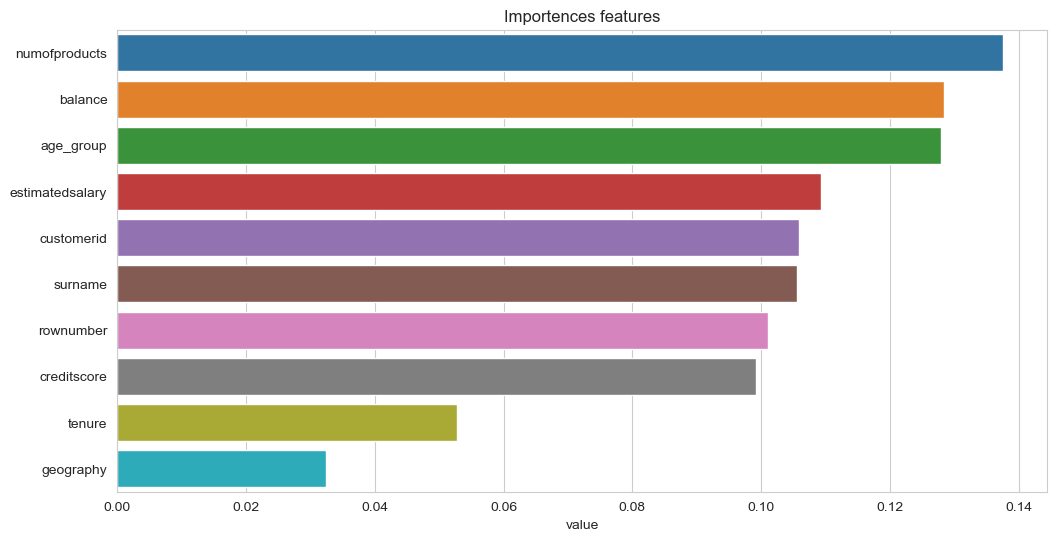

In [56]:
clf = RandomForestRegressor(n_estimators=50, random_state=123)
clf.fit(X, y)
sorted(np.round(clf.feature_importances_, 4), reverse=True)
fig, ax = plt.subplots(figsize=(12, 6))
importances = clf.feature_importances_
indices = np.argsort(importances)
title = "Importences features"
importences_features = pd.DataFrame(data={"value": importances, "title": np.array(title_features)[range(len(indices))]})
sns.barplot(data=importences_features.sort_values("value", ascending=False), x="value", y="title")
ax.set(ylabel=None, title=title)

<AxesSubplot:>

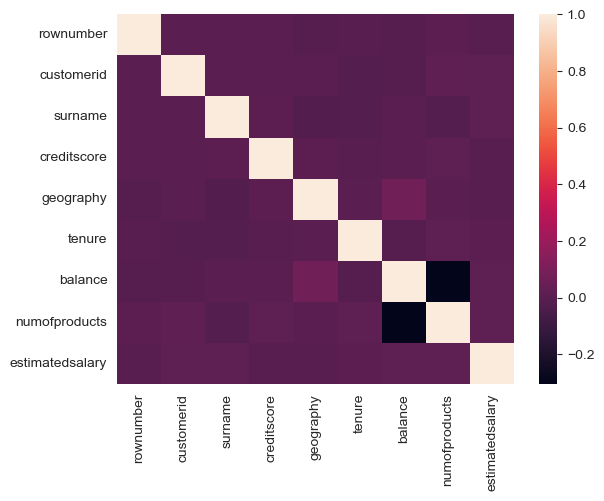

In [57]:
fig, ax = plt.subplots()
cln_date = df_tr[title_features]
correlation = cln_date.drop(["age_group"], axis=1).corr(min_periods=3)
correlation.set_index(correlation.columns, inplace=True)
correlation.to_csv('result_correlation.csv', encoding='utf-8', index=True)

sns.heatmap(correlation, ax=ax)